## Pridicting the Sale Price of Bulldozers using machine learning with regression

The goal is to predicting the sale price of bulldozer using past sale data.


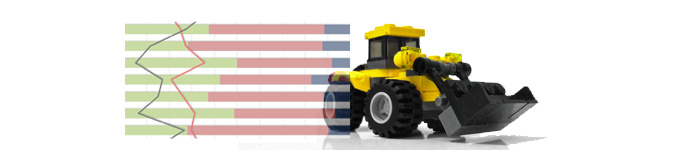

### Problem Definition:

> The goal is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration. 

### Data:

The Data on which we are working is downloaded from Kaggle bluebook bulldozres competition:https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### Evaluation:

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more on the evaluation of this project :https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimise the error.For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

### Features:

You can check the features of this data dictionary on:https://www.kaggle.com/c/bluebook-for-bulldozers/data?

In [1]:
# Import libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import training and validation datasets
bulldozers_df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                            low_memory=False)

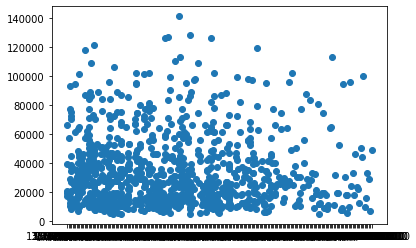

In [2]:
fig, ax = plt.subplots()
ax.scatter(bulldozers_df["saledate"][:1000], bulldozers_df["SalePrice"][:1000]);

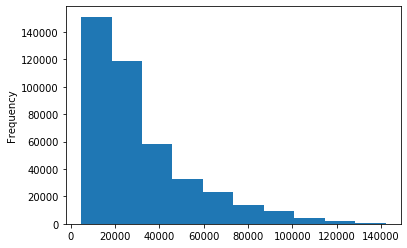

In [3]:
bulldozers_df.SalePrice.plot.hist();

In above histogram plot, we observed that as the saling price increases the no. of bulldozers sold are decreases.

## Parsing Dates

when we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [4]:
# Parsing dates
bulldozers_df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                            low_memory=False,
                            parse_dates=["saledate"])

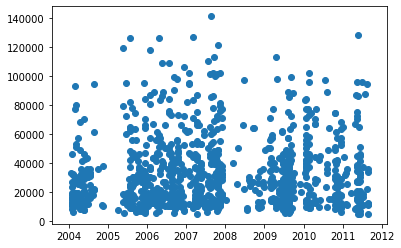

In [5]:
fig, ax = plt.subplots()
ax.scatter(bulldozers_df["saledate"][:1000], bulldozers_df["SalePrice"][:1000]);

In [6]:
bulldozers_df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

Here we could see that our dataframe is not according to the saledate order...
> It would be better to arrange dataframe in order according to date.

### Sort DataFrame by order of saledate

In [7]:
bulldozers_df.sort_values(by=["saledate"], inplace=True, ascending=True)
bulldozers_df.saledate[:20]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of our original DataFrame

We make a copy of original DataFrame, such that we've still got our original data.

In [8]:
bulldozers_df_temp = bulldozers_df.copy()

In [9]:
bulldozers_df_temp["saleYear"] = bulldozers_df_temp.saledate.dt.year
bulldozers_df_temp["saleMonth"] = bulldozers_df_temp.saledate.dt.month
bulldozers_df_temp["saleDay"] = bulldozers_df_temp.saledate.dt.day
bulldozers_df_temp["saleDayOfWeek"] = bulldozers_df_temp.saledate.dt.dayofweek
bulldozers_df_temp["saleDayOfyear"] = bulldozers_df_temp.saledate.dt.dayofyear

In [10]:
bulldozers_df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [11]:
# Now we have need of saledate column anymore, we can remove it now because we've enrich our dataframe with datetime.
bulldozers_df_temp.drop("saledate", inplace=True, axis=1)

## Modeling

In [12]:
# Let's Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=21)

We can't fit our model write now because some features are object datatype in dataframe. first, we have to convert object strings into numeric.
Second, we has to remove or fill the missing spaces in dataset.

### Convert string to categories:

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas by searching for `pandas.api.types`

In [13]:
# Let's find the columns containing strings
for label, content in bulldozers_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [14]:
# Let's converting all the strings columns into categories
for label, content in bulldozers_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        bulldozers_df_temp[label] = content.astype("category").cat.as_ordered()

In [15]:
bulldozers_df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [16]:
bulldozers_df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Till now we convert all the strings into categories, now we can access all of our data.

#### Let's deal with the missing values in Dataframe

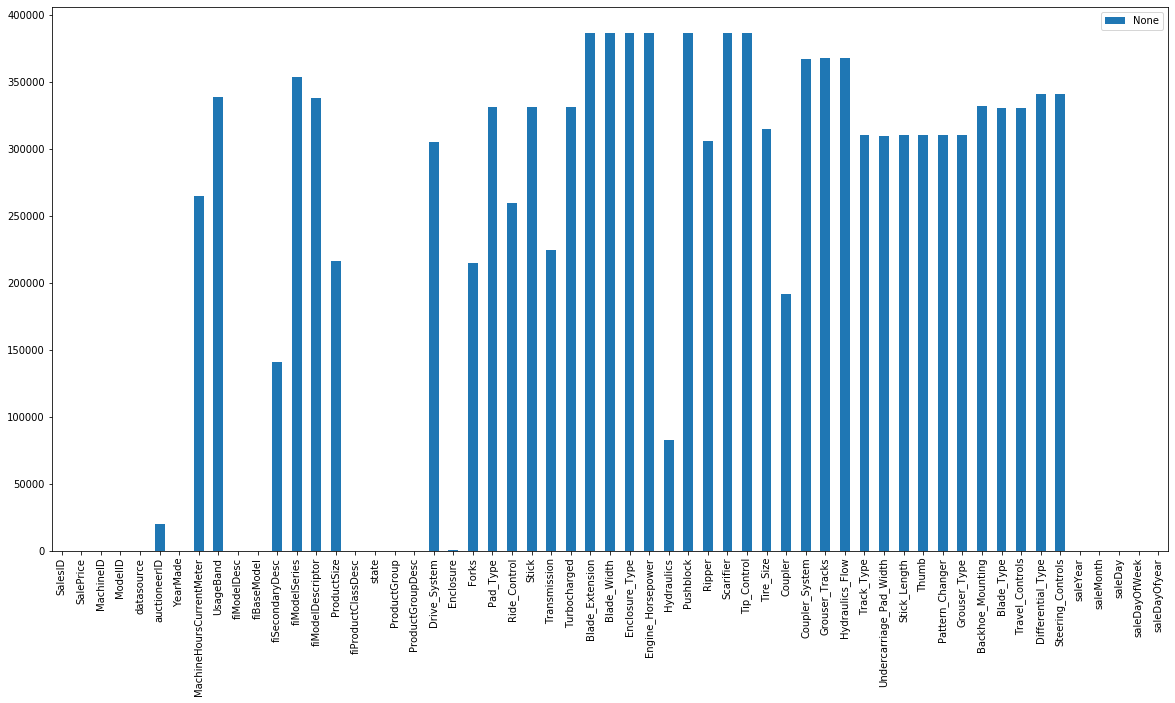

In [17]:
bulldozers_df_temp.isna().sum().plot.bar(figsize=(20,10)).legend();

## Save Preprocessed Data

>It would be always better in modeling a machine learning model to always have an idea about original data.

In [18]:
# export 
bulldozers_df_temp.to_csv("data/bluebook-for-bulldozers/train_temp.csv",
                          index=False)

In [19]:
# import 
bulldozers_df_temp = pd.read_csv("data/bluebook-for-bulldozers/train_temp.csv",
                                 low_memory=False)

In [20]:
# Fill missing numerical values
for label, content in bulldozers_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # This line create a new column which tells us is this column contains any missing value before
            bulldozers_df_temp[label+"_is_missing"] = pd.isnull(content)
            # fill missing numerical values with median
            bulldozers_df_temp[label] = content.fillna(content.median())

**`median()` is more robust than `mean()` thats why we used `median()` over `mean()`.**

In [21]:
# Fill missing categorical values and also convert them into numbers
for label, content in bulldozers_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether it contain missing value or not
        bulldozers_df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add+1 (we are adding +1 because missing values automatically assign to -1 and 
        # we want it as 0)
        bulldozers_df_temp[label] = pd.Categorical(content).codes+1

In [22]:
bulldozers_df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [23]:
bulldozers_df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


Now we are all ready to build our machine learning model.We convert all strings columns into numbers & we fill all those missing values.

In [24]:
%%time
# Let's Instantiate model and fit the model 
model = RandomForestRegressor(n_jobs=-1, random_state=21)
model.fit(bulldozers_df_temp.drop("SalePrice", axis=1), bulldozers_df_temp["SalePrice"])

D:\anaconda navigator\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 30.4 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

In [25]:
# check the score of model on same data
model.score(bulldozers_df_temp.drop("SalePrice", axis=1), bulldozers_df_temp["SalePrice"])

0.9821613718116723

**Note:** Our metric is not reliable write now, because it scores on the same dataset onwhich we fit this model.
    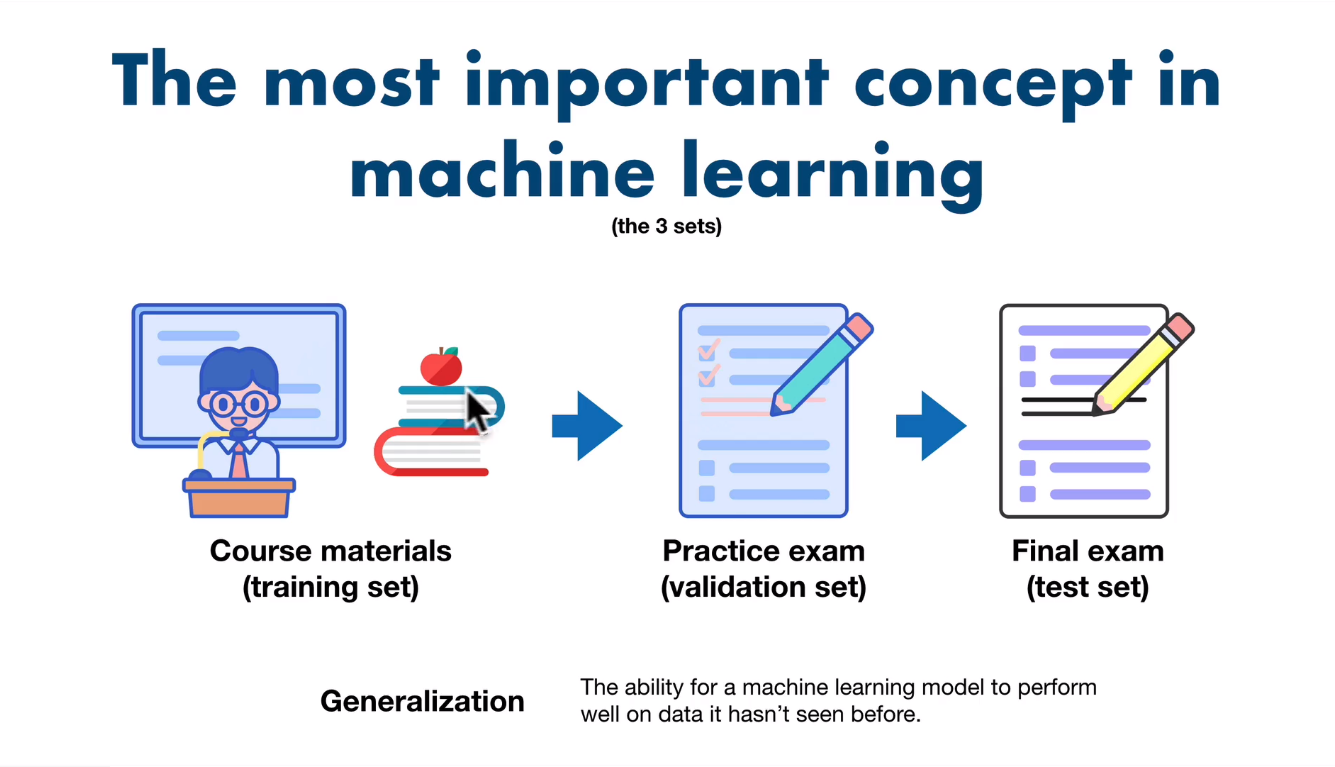

### Split data into train and valid sets

* Train.csv is the training set, **which contains data through the end of 2011.**
* Valid.csv is the validation set, **which contains data from January 1, 2012 - April 30, 2012** You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

In [26]:
bulldozers_df_train = bulldozers_df_temp[bulldozers_df_temp["saleYear"] != 2012]
bulldozers_df_valid = bulldozers_df_temp[bulldozers_df_temp["saleYear"] == 2012]

# Split data into X & Y
x_train, y_train = bulldozers_df_train.drop("SalePrice", axis=1), bulldozers_df_train.SalePrice
x_valid, y_valid = bulldozers_df_valid.drop("SalePrice", axis=1), bulldozers_df_valid.SalePrice

## Evaluation function 

In [27]:
# The evaluation metric for this competition is RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def RMSLE(y_test, y_preds):
    """
    Calculates root mean squared log error between prediction labels and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on different levels
def display_scores(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    scores = {"Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, valid_preds),
              "Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE": RMSLE(y_train, train_preds),
              "Valid RMSLE": RMSLE(y_valid, valid_preds)}
    return scores

In [28]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=21,
                             n_estimators=100)
model.fit(x_train, y_train)

Wall time: 4min 13s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

In [29]:
display_scores(model)

{'Training R^2': 0.9875684979997216,
 'Valid R^2': 0.8727470729425173,
 'Training MAE': 1578.8296320598317,
 'Valid MAE': 6111.265767735246,
 'Training RMSLE': 0.08418211695515064,
 'Valid RMSLE': 0.2544903926817164}

## Tuning Hyperparameters (Using RandomizedSearchCV)

This cell takes a long to run, if you want you can run this cell by yourself and get the best parameters.
I run this cell with 100 iterations this takes 2hrs and find the best params, which we use in our ideal model.

#%%time
#from sklearn.model_selection import RandomizedSearchCV

Set parameters for param_grid
#rs_grid = {"n_estimators": np.arange(10, 110, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}
           #"max_samples": [10000]}

 Instantiate our model RandomizedSearchCV
#rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    n_estimators=100,
                                                    random_state=21),
                             param_distributions=rs_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

#rs_model.fit(x_train, y_train)

rs_model.best_params_

display_scores(rs_model)

In [31]:
%%time

#Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    random_state=21)

#fit the ideal model
ideal_model.fit(x_train, y_train)

Wall time: 56.3 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

In [32]:
  display_scores(ideal_model)

{'Training R^2': 0.9588715313537013,
 'Valid R^2': 0.8821873719681506,
 'Training MAE': 2953.8734623144296,
 'Valid MAE': 5947.714550876829,
 'Training RMSLE': 0.14462972085974096,
 'Valid RMSLE': 0.2463653416159278}

## Make Predictions on test data

In [58]:
test_df = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Transform test data into form of train data to make predictions 

In [59]:
# Make a function to preprocess data 
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfyear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill missing numerical values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # This line create a new column which tells us is this column contains any missing value before
                df[label+"_is_missing"] = pd.isnull(content)
                # fill missing numerical values with median
                df[label] = content.fillna(content.median())
                
            # Fill categries data and convert them into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Create a column to indicate whether it contains null value or not
            df[label+"_is_missing"] = pd.isnull(content)
            # convert categories into no.
            df[label] = pd.Categorical(content).codes+1
    return df

In [60]:
test_df = preprocess_data(test_df)

In [61]:
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [62]:
test_df["auctioneerID_is_missing"] = False

In [63]:
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [64]:
test_preds = ideal_model.predict(test_df)

In [65]:
preds_df = pd.DataFrame()
preds_df["SalesID"] = test_df["SalesID"]
preds_df["SalesPrice"] = test_preds
preds_df.head()

,SalesID,SalesPrice
0,1227829,21466.569048
1,1227844,17543.787295
2,1227847,46628.282885
3,1227848,64670.387655
4,1227863,47609.601949
